In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

df_list = []
filename_list = []
for filename in os.listdir("data/cleaned_data"):
    df = pd.read_csv(f"data/cleaned_data/{filename}")
    filename_list.append(filename)
    df_list.append(df)
print(filename_list)

['depth_resistance_65.csv', 'depth_resistance_68.csv', 'depth_resistance_6.csv', 'depth_resistance_78.csv', 'depth_resistance_43.csv', 'depth_resistance_37.csv', 'depth_resistance_29.csv', 'depth_resistance_58.csv', 'depth_resistance_30.csv', 'depth_resistance_36.csv', 'depth_resistance_12.csv', 'depth_resistance_66.csv', 'depth_resistance_76.csv', 'depth_resistance_24.csv', 'depth_resistance_4.csv', 'depth_resistance_38.csv', 'depth_resistance_22.csv', 'depth_resistance_48.csv', 'depth_resistance_11.csv', 'depth_resistance_62.csv', 'depth_resistance_42.csv', 'depth_resistance_34.csv', 'depth_resistance_54.csv', 'depth_resistance_69.csv', 'depth_resistance_35.csv', 'depth_resistance_73.csv', 'depth_resistance_40.csv', 'depth_resistance_61.csv', 'depth_resistance_17.csv', 'depth_resistance_0.csv', 'depth_resistance_53.csv', 'depth_resistance_20.csv', 'depth_resistance_56.csv', 'depth_resistance_33.csv', 'depth_resistance_23.csv', 'depth_resistance_72.csv', 'depth_resistance_55.csv', 'de

In [41]:
data_df = pd.read_csv("data/features.csv")
print(data_df)
features_df = data_df.drop(columns=['cleaned_filenames', 'uncleaned_filenames'])
filenames_map_df = data_df.drop(columns=features_df.columns)

    res_mean  overall_slope  overall_depth  overall_resistance  \
0   0.709976      -0.130390       0.209521            0.081697   
1  -0.672055      -1.045555       1.365080           -1.053545   
2  -1.218843       0.463150      -0.714387            0.288236   
3  -1.410088      -1.872830       2.231655           -1.771156   
4   0.030962       0.095832      -0.047660            0.412643   
..       ...            ...            ...                 ...   
75  1.712736       2.188703      -1.651172            1.221120   
76 -0.119566       0.770111      -0.857084            0.944077   
77 -1.258152      -1.474872       1.840031           -1.472376   
78 -1.389800      -1.302437       0.799018           -1.603459   
79 -0.929366      -1.078369       1.043905           -1.243667   

          cleaned_filenames  uncleaned_filenames  
0   depth_resistance_65.csv  WS23_L3_T1_P_18.csv  
1   depth_resistance_68.csv  WS23_L2_T1_P_17.csv  
2    depth_resistance_6.csv  WS23_L1_T1_P_21.csv  
3  

# Visualization Functions

In [42]:
from sklearn.decomposition import PCA

label_color_map = {0: 'red', 1: 'gold', 2: 'blue', 3: 'green', 4: 'purple', 5: 'pink',
        6: 'brown', 7: 'orange', 8: 'cyan', 9: 'magenta', 10: 'yellow',
        11: 'lime', 12: 'teal', 13: 'navy', 14: 'maroon', 15: 'olive',
        16: 'coral', 17: 'grey', 18: 'salmon', 19: 'turquoise'}

size_fig = (4,3)

def get_curve_idx_from_cluster_color(color, y_labels):
    print(f"Indexes of curves assigned to {color} cluster: ")
    for i, label in enumerate(y_labels):
        if label_color_map[label] == color:
            print(filename_list[i])

def visualize_clusters(representation_list, y_labels, graph_title="", generate_plot_idx=-1, kmeans_centroids=False, use_pca=False, two_d=False, plot_all_curves_oneplot=False, cluster_i_overlay=False):
    if generate_plot_idx != -1:
        combined_columns = pd.concat(df_list)
        plt.figure(figsize=size_fig)

        plt.xlabel('Depth (m)')
        plt.ylabel('Resistance (N)')
        plt.title('Depth vs Resistance Curve')
        plt.xlim([0, combined_columns["depth"].max()])
        plt.ylim([0, combined_columns["resistance"].max()])
        plt.plot(df_list[generate_plot_idx]["depth"], df_list[generate_plot_idx]["resistance"], c='black')
    
    if use_pca:
        # calculate PCA
        pca = PCA(n_components=2) # reduce data down to 2 dims
        # print(f"representation_list: {representation_list.values}")
        pca.fit(representation_list.values)
        X_pca = pca.transform(representation_list.values)
        # plot
        plt.figure(figsize=size_fig)
        plt.title(f"{graph_title} Clustering Visualized with pca")
        colors = [label_color_map[label] for label in y_labels]
        plt.scatter(X_pca[:,0], X_pca[:,1], c=colors, alpha=0)
        for i in range(X_pca.shape[0]): # loops over every point
            plt.text(X_pca[i,0], X_pca[i,1], str(i), c=label_color_map[y_labels[i]], fontsize=8)

        # special cases per algorithm used
        if graph_title.lower() == "kmeans" and kmeans_centroids.any():
            centroids_pca = pca.transform(kmeans_centroids)
            plt.scatter(centroids_pca[:,0], centroids_pca[:,1], c="Red", marker="^", s=180)
        if graph_title.lower() == "dbscan":
            plt.scatter([], [], c=label_color_map[max(y_labels)], label='Outliers')
            plt.legend()

        # plot
        plt.savefig(f"figures/{graph_title.lower()}/PCA", bbox_inches='tight')
        plt.show()
        plt.close() # clear figure 

    if plot_all_curves_oneplot:
        a = 0.3
        combined_columns = pd.concat(df_list, axis=0, ignore_index=True)
        plt.figure(figsize=size_fig)
        for i, y in enumerate(y_labels):
            df = df_list[i]
            color = label_color_map.get(y, 'black')  # default to black if label not in map
            plt.plot(df["depth"], df["resistance"], color=color, alpha=a)
        plt.xlabel('Depth (m)')
        plt.ylabel('Resistance (N)')
        plt.title('Depth vs Resistance Curves')
        plt.xlim([0, combined_columns["depth"].max()])
        plt.ylim([0, combined_columns["resistance"].max()])
        plt.savefig(f"figures/{graph_title.lower()}/cluster_curves", bbox_inches='tight')
        plt.show()
        plt.close() # clear figure 

    if cluster_i_overlay:
        combined_columns = pd.concat(df_list, axis=0, ignore_index=True)
        a = 1
        # color_list = ["Red", "Grey", "Blue", "Green", "Purple", "Pink", "Brown"]
        for i in range(max(y_labels)+1): # for each cluster, +1 bc clusters are 0 indexed too
            plt.figure(figsize=size_fig)
            plt.xlabel('Depth (m)')
            plt.ylabel('Resistance (N)')
            plt.xlim([0, combined_columns["depth"].max()])
            plt.ylim([0, combined_columns["resistance"].max()])
            plt.title(f'{label_color_map.get(i, 'black').capitalize()} Cluster: Depth vs Resistance Curves')
            for j in range(len(y_labels)): # for each curve
                if i == y_labels[j]: # if the curve is in cluster
                    color = label_color_map.get(i, 'black')
                    plt.plot(df_list[j]["depth"], df_list[j]["resistance"], color=color, alpha=a)
            plt.savefig(f"figures/{graph_title.lower()}/{color}_cluster", bbox_inches='tight')
            plt.show()
            plt.close() # clear figure 

    if two_d and len(representation_list.columns) == 2:
        x = representation_list.columns[0]
        y = representation_list.columns[1]
        plt.scatter(representation_list[x], representation_list[y], c=y_labels, cmap="coolwarm")
        plt.title(f"{graph_title} Clustering: {x} and {y}")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
        plt.close() # clear figure 



# PCA Analysis

In [43]:

def pca_analysis(representation_list):
    pca = PCA(n_components=len(representation_list.columns))
    pca.fit(representation_list.values)

    # plot scree plot
    plt.figure(figsize=size_fig)
    plt.title("Scree Plot")
    plt.xlabel("PC Number")
    plt.ylabel("Eigenvalue")
    plt.xticks(range(1, pca.n_components_+1))
    plt.plot(range(1, pca.n_components_+1), pca.explained_variance_)
    plt.show()

    # principal component table
    principle_components_table = pd.DataFrame({
        "PC": range(1,pca.n_components_+1),
        "Eigenvalue": pca.explained_variance_,
        "Proportion": pca.explained_variance_ratio_
    })
    principle_components_table.set_index('PC', inplace=True)
    principle_components_table["Cumulative"] = principle_components_table["Proportion"].cumsum()
    print(principle_components_table)

    loadings = pca.components_.T
    pc_labels = [f'PC{i+1}' for i in range(loadings.shape[1])]
    loadings_df = pd.DataFrame(loadings, index=representation_list.columns, columns=pc_labels)
    print('\n')
    print(loadings_df)

# K-Means Clustering Implementation w/ k-means++ initialization for centroids

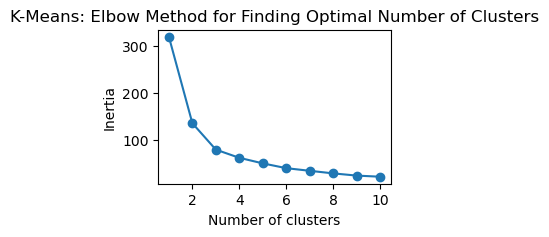

In [44]:
from sklearn.cluster import KMeans
import numpy as np

inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=100).fit(features_df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(3,2))
plt.plot(range(1,11), inertias, marker='o')
plt.title("K-Means: Elbow Method for Finding Optimal Number of Clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid=True
plt.show()

# K-Means Clustering
- assumes
    - spherical clusters (isotropic)
    - similar size clusters (equal variance)
    - features are on same scale
    - clusters are linearly separable
    - number of clusters (k) is known

In [45]:
kmeans_elbow = 6
kmeans = KMeans(n_clusters=kmeans_elbow, init="k-means++", n_init=100).fit(features_df)
print(f"kmeans labels:\n{kmeans.labels_}")
# print(f"kmeans cluster centers: {kmeans.cluster_centers_}")
# pca_analysis(features_df)
# visualize_clusters(features_df, kmeans.labels_, graph_title="KMeans", kmeans_centroids=kmeans.cluster_centers_, use_pca=True, two_d=False, plot_all_curves_oneplot=True, cluster_i_overlay=True)

kmeans labels:
[2 3 5 3 5 1 3 0 3 1 1 3 1 4 2 2 2 4 4 5 5 2 4 0 3 1 5 4 1 1 3 5 1 1 5 4 2
 5 5 1 3 5 1 0 5 2 1 4 2 4 3 0 5 2 5 3 2 2 2 2 5 2 5 5 2 2 0 2 3 1 0 5 5 2
 0 4 5 3 3 3]


# Hierarchical Clustering

[1 2 1 2 1 0 2 3 2 0 0 2 0 4 1 1 1 4 4 1 1 1 4 3 2 0 1 4 0 0 2 0 0 0 1 4 1
 1 0 0 2 1 0 2 0 1 0 0 1 4 2 3 1 1 1 2 1 1 1 1 1 1 0 0 1 1 3 1 2 0 3 1 1 1
 3 4 0 2 2 2]


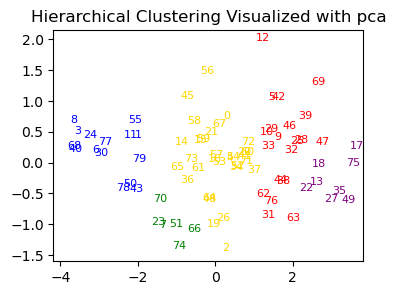

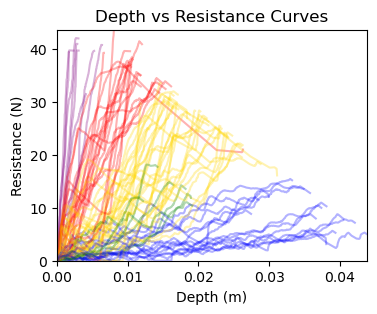

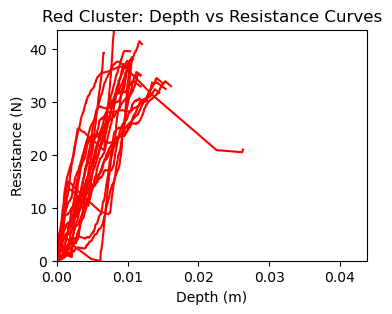

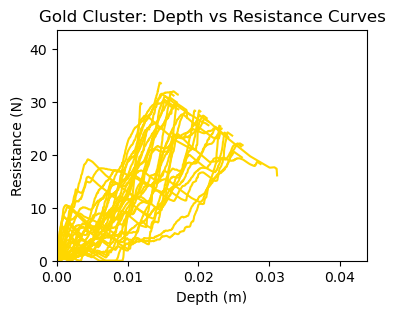

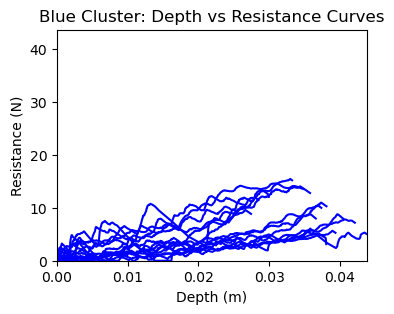

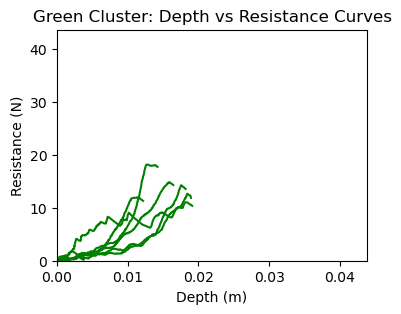

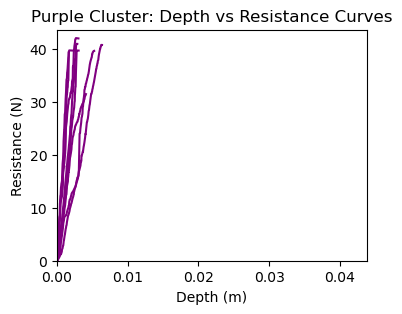

In [46]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# if distance_threshold != None then n_clusters = None
hierarchical = AgglomerativeClustering(distance_threshold=None, n_clusters=5)
hierarchical.fit(features_df)
linkage = "Ward"
print(hierarchical.labels_)
# get_curve_idx_from_cluster_color("green", hierarchical.labels_)
visualize_clusters(features_df, hierarchical.labels_, graph_title="Hierarchical", use_pca=True, plot_all_curves_oneplot=True, cluster_i_overlay=True)

# Manual Clustering

Indexes of curves assigned to pink cluster: 
depth_resistance_29.csv
depth_resistance_72.csv
depth_resistance_49.csv
depth_resistance_71.csv
depth_resistance_74.csv
depth_resistance_79.csv
depth_resistance_14.csv
depth_resistance_63.csv


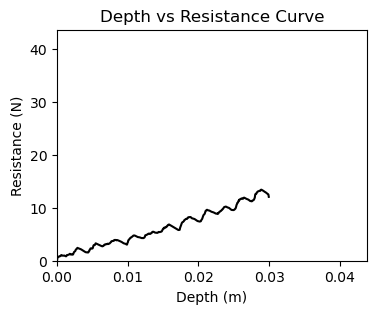

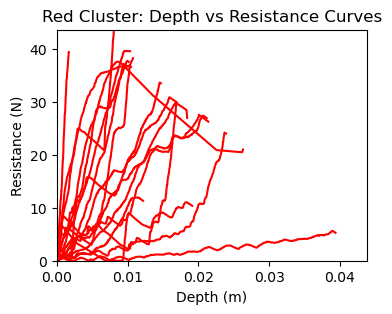

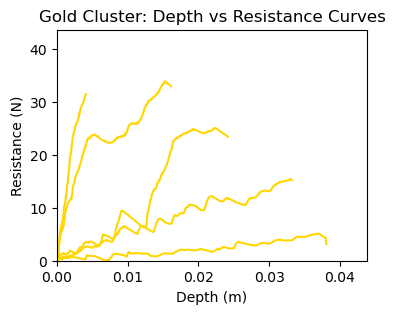

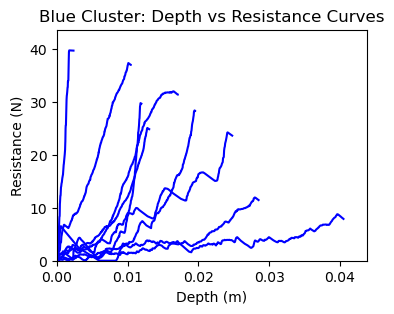

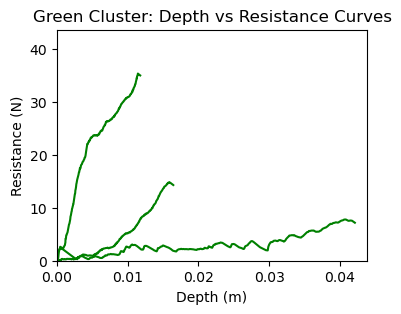

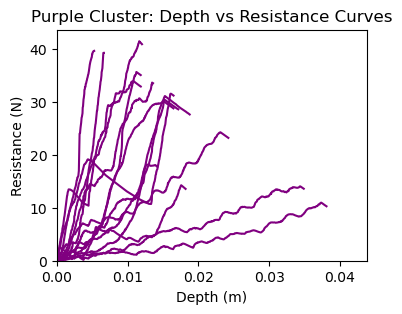

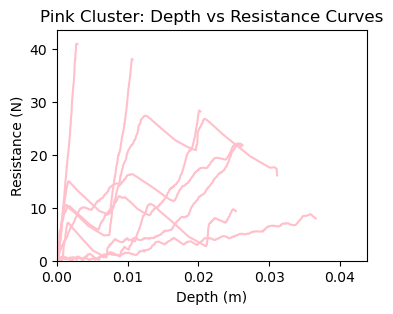

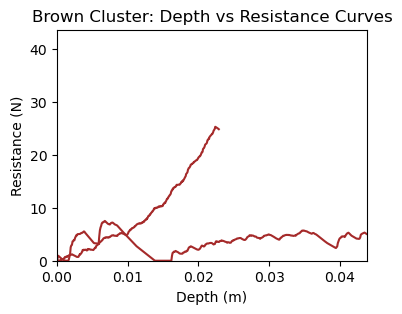

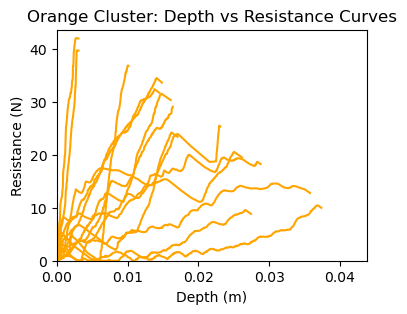

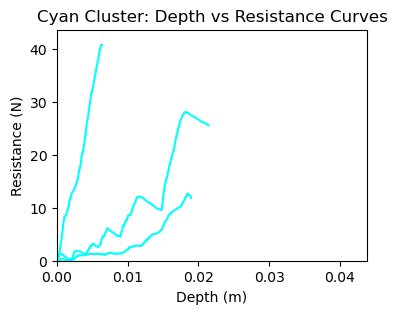

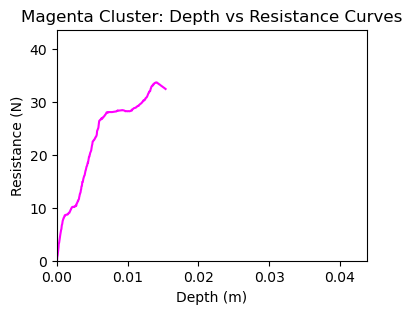

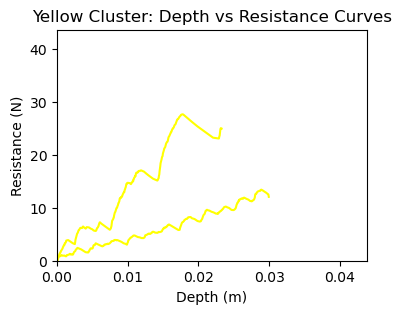

In [47]:
label_color_map = {0: 'red', 1: 'gold', 2: 'blue', 3: 'green', 4: 'purple', 5: 'pink',
        6: 'brown', 7: 'orange', 8: 'cyan', 9: 'magenta', 10: 'yellow',
        11: 'lime', 12: 'teal', 13: 'navy', 14: 'maroon', 15: 'olive',
        16: 'coral', 17: 'grey', 18: 'salmon', 19: 'turquoise', 20: 'black'}
y_labels = [0, 1, 2, 3, 4, 1, 5, 4, 6, 4, 7, 4, 0, 4, 7, 4, 8, 7, 8, 0, 4, 7, 1, 8, 2, 0, 
            2, 7, 0, 7, 7, 7, 2, 4, 4, 5, 0, 0, 0, 4, 1, 2, 9, 5, 5, 7, 3, 0, 7, 0, 2, 3, 
            7, 5, 0, 7, 5, 0, 5, 1, 4, 6, 4, 4, 2, 5, 4, 10, 0, 0, 0, 7, 0, 2, 0, 2, 0, 4,
            7, 10]
# visualize_clusters(features_df, )
get_curve_idx_from_cluster_color("pink", y_labels)
visualize_clusters(features_df.iloc[:len(y_labels)], y_labels, generate_plot_idx=len(y_labels)-1, cluster_i_overlay=True)

In [48]:
all_ = [6, 7, 13, 15, 23, 31, 32, 39, 47, 51, 55, 62, (68, 67), (73, 72), ]
bad = [23, (68, 67)]

# DBSCAN

[ 0  1 -1  2  0  3  2  4  2  5  5  1 -1  6  0  0  0  7  6  8  0  0 -1  4
  2  5  9 10  5  5  2  0  5  5  0 10  0  0  0  5  2  0  3  1  0  0  5  6
  9 10  1  4  0  0  0  1 -1  0  0  0  0  0  0 -1  8  0 -1  0  2 -1 -1  0
  0  0 -1  7  0  2  1  1]
Indexes of curves assigned to yellow cluster: 
depth_resistance_61.csv
depth_resistance_72.csv
depth_resistance_75.csv


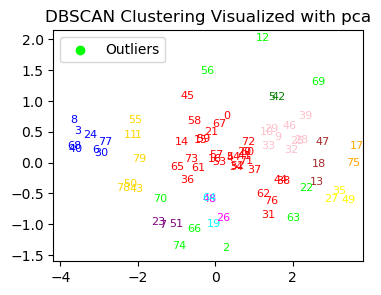

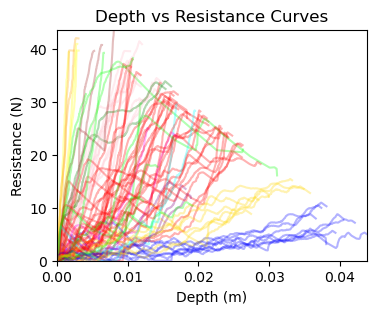

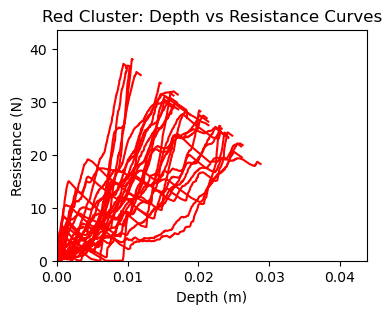

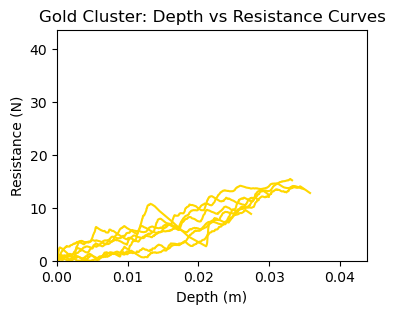

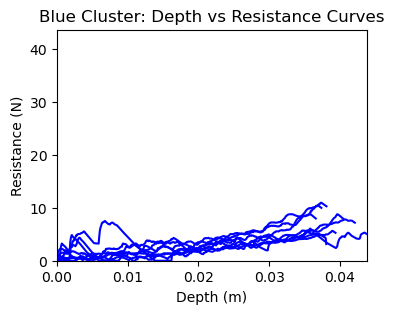

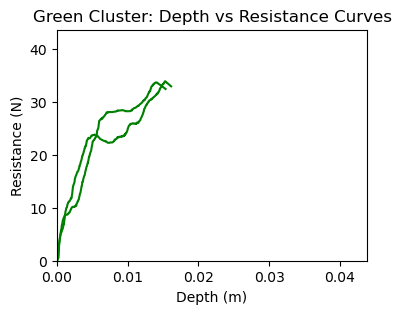

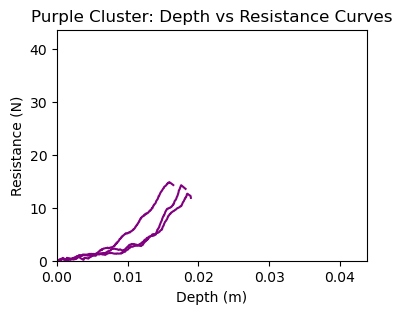

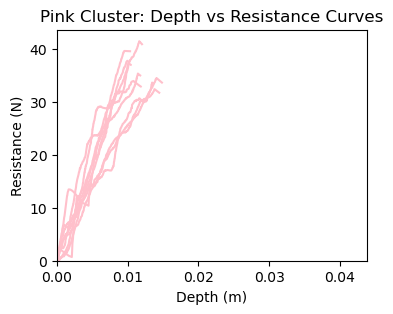

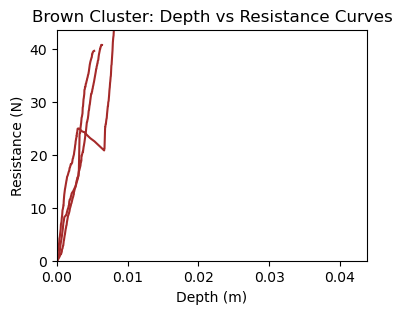

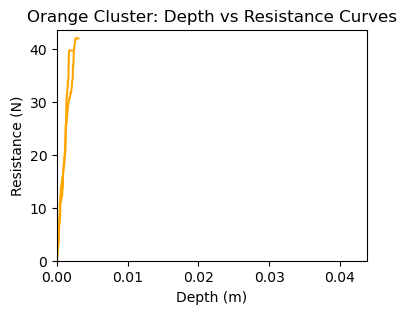

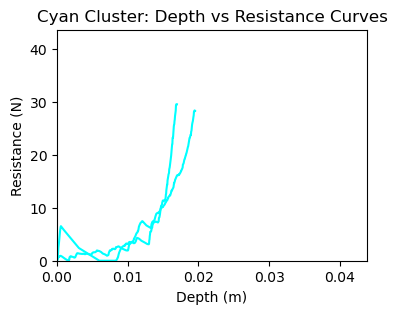

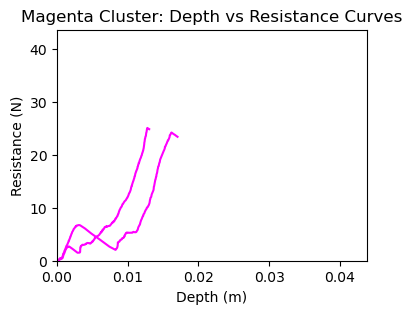

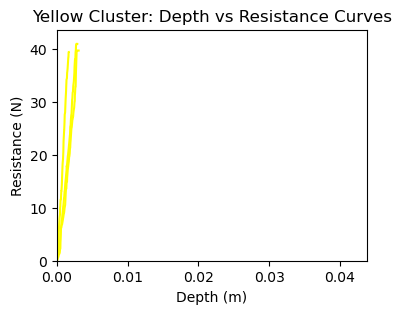

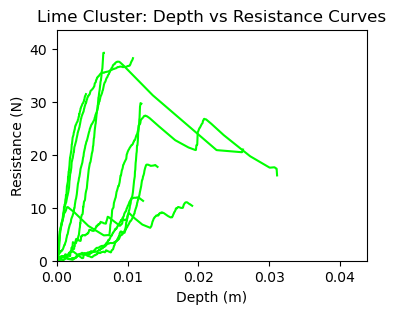

In [49]:
from sklearn.cluster import DBSCAN

# eps=0.7, min_samples=3 works very well
dbscan = DBSCAN(eps=0.5, min_samples=2).fit(features_df)
print(dbscan.labels_)
cleaned_db_labels = [label if label != -1 else max(dbscan.labels_)+1 for label in dbscan.labels_]
get_curve_idx_from_cluster_color("yellow", cleaned_db_labels)
visualize_clusters(features_df, y_labels = cleaned_db_labels, graph_title="DBSCAN", use_pca=True, plot_all_curves_oneplot=True, cluster_i_overlay=True)